In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("subscribers data for cluster.csv")

In [3]:
data.head()
data_1=data.dropna()
data_1
data_2 = pd.get_dummies(data_1,columns = ['package_type','preferred_genre','intended_use','male_TF','payment_type','attribution_survey','attribution_technical','plan_type','op_sys','initial_credit_card_declined','current_sub_TF','trial_completed'])
data_2
data_2.to_csv('data_2.csv')

In [5]:
feature_x = [tag for tag in data_2.columns if tag not in ['subid']]
X = data_2[feature_x].values
num_samples, num_features = X.shape
print('feature dim:', X.shape)

feature dim: (29891, 91)


In [6]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(X)

In [7]:
SSE = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

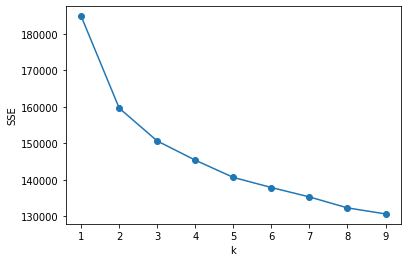

In [8]:
X = range(1,10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [9]:
from sklearn.metrics import silhouette_score

scores = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores[k] = score
print(scores)  

{2: 0.14572002645180535, 3: 0.09392914819358883, 4: 0.08092649916538196, 5: 0.08115650597414173, 6: 0.08446328159466912, 7: 0.06574066371878698, 8: 0.06112832232947602, 9: 0.07485884052799925}


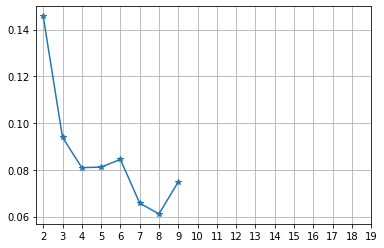

In [10]:
ax = plt.subplot()
ax.plot(scores.keys(), scores.values(), '-*')
ax.set_xticks(np.arange(2, 20))
ax.grid()
plt.show()

In [11]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k, random_state=2020)
y_pred = kmeans.fit_predict(X_scaled)

In [12]:
data_2['cluster']= y_pred
data_2.to_csv('data_withcluster.csv')

In [13]:
def visualize_cluster_result(x, dim1, dim2, y_pred, k):
    # select two feature dims: dim1, dim2, visualize the clusters
    assert dim1 in range(x.shape[1])
    assert dim2 in range(x.shape[1])
    ax = plt.subplot()
    # use a for loop to plot each cluster (with different colors)
    for i in range(k):
        ax.scatter(x[y_pred == i, dim1], x[y_pred ==  i, dim2], label='cluster: %d' % i)
    plt.title('Visualization of clustering of dim %d and dim %d' % (dim1, dim2))
    ax.set_xlabel('dim: %d' % dim1)
    ax.set_ylabel('dim: %d' % dim2)
    ax.legend()
    plt.show()

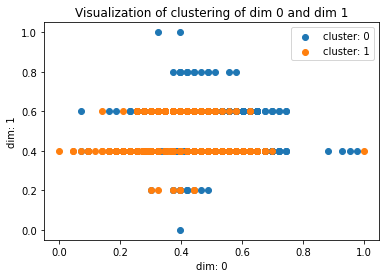

In [14]:
visualize_cluster_result(X_scaled, 0, 1, y_pred, k)